<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day9_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept:**

Facial Recognition Basics
Face detection is about identifying where in an image human faces appear. This is different from face recognition (which identifies who someone is).

**Understanding Face Detection Technology**

**What is Face Detection?**

Face detection is a computer vision technology that identifies human faces in digital images. Unlike facial recognition (which identifies WHO someone is), face detection simply locates WHERE faces appear in an image.

#How Face Detection Works

**Image Preprocessing:**

Converting to grayscale simplifies processing
Normalizing lighting and contrast improves detection


**Detection Algorithm Types:**

Haar Cascade Classifiers: Fast but less accurate, great for beginners
HOG (Histogram of Oriented Gradients): Better accuracy, still efficient
Deep Learning-based detectors: Most accurate but require more computing power


**Technical Process:**

The algorithm scans the image using "sliding windows" of different sizes
For each window position, it applies the detection model
When a face pattern is recognized, it marks the location with coordinates

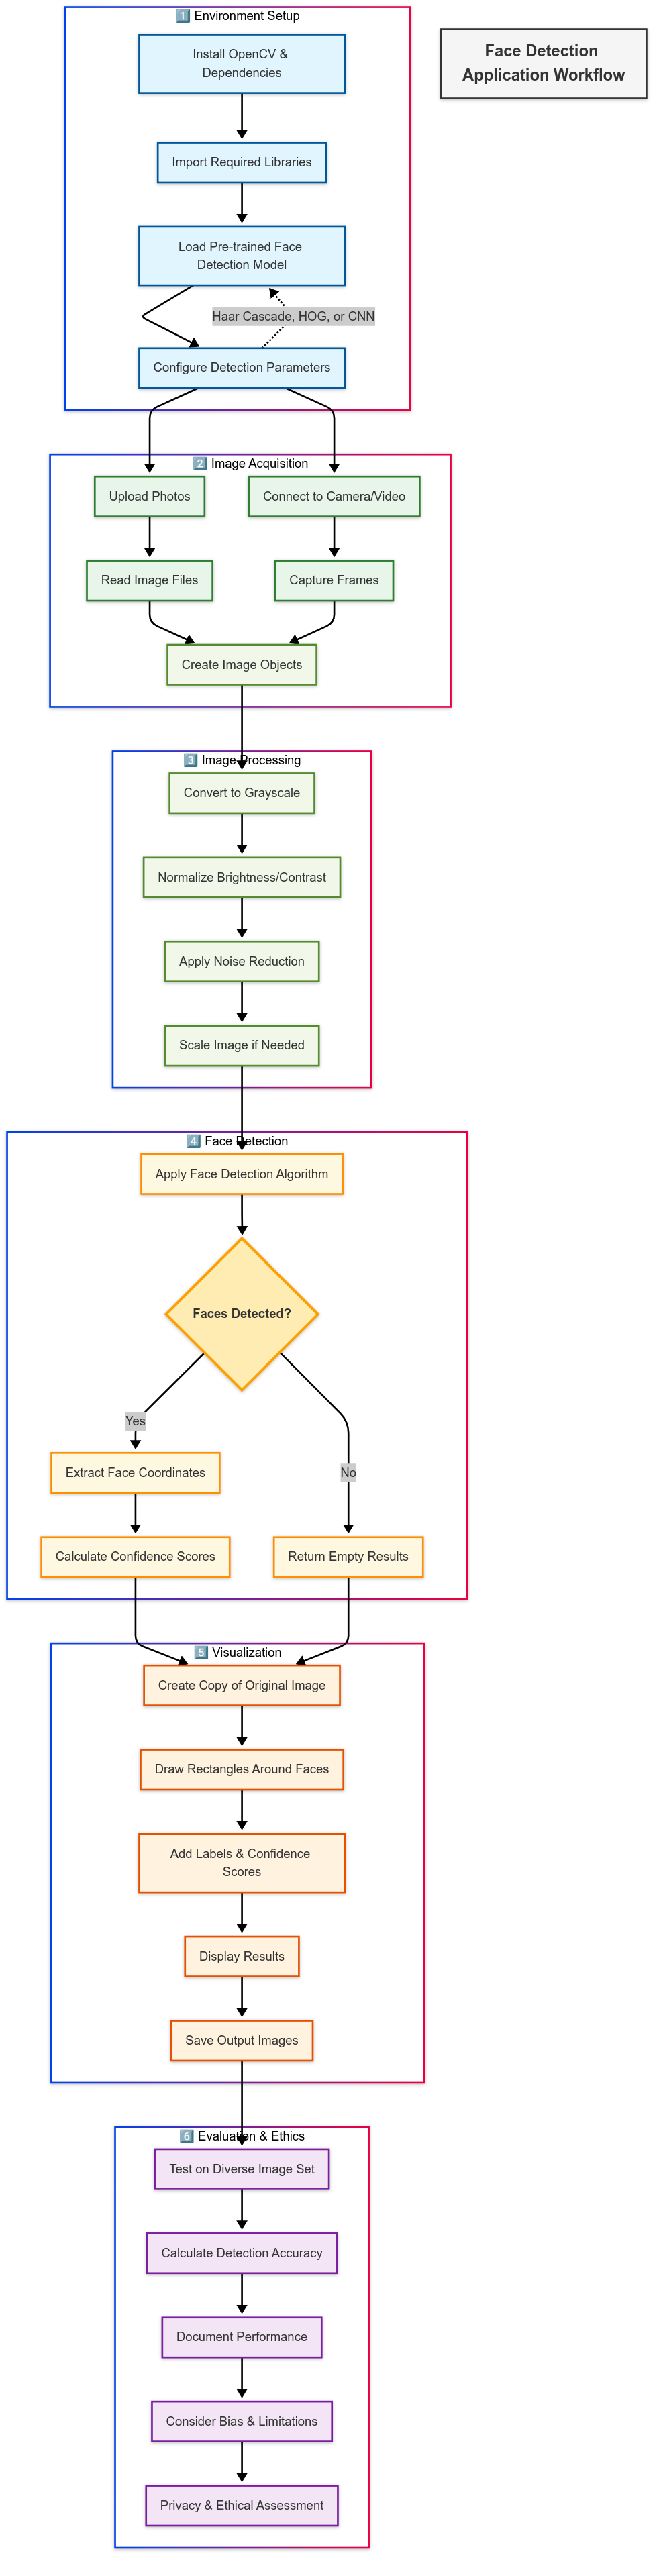

# Setup and Library Installation

In [5]:
# Day 9: Face Detection App
# 30-Day AI Mini-Projects Challenge


!pip install opencv-python
!pip install matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import os

# Configure matplotlib for better visualization
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# Load Face Detection Model

In [6]:
# Download the pre-trained Haar Cascade face detector
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

--2025-04-23 18:05:46--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.3’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2025-04-23 18:05:46 (21.4 MB/s) - ‘haarcascade_frontalface_default.xml.3’ saved [930127/930127]

--2025-04-23 18:05:46--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443.

#  Image Acquisition

In [7]:
# Function to upload images from local machine
def upload_images():
    uploaded = files.upload()
    return uploaded

# Let's have the user upload some test images
print("Please upload some test images:")
uploaded_files = upload_images()

Please upload some test images:


Saving images.jpg to images (3).jpg


#  Face Detection Function

In [13]:
def detect_faces(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,  # Parameter specifying how much the image size is reduced at each image scale
        minNeighbors=5,   # Parameter specifying how many neighbors each candidate rectangle should have
        minSize=(30, 30)  # Minimum rectangle size to be considered a face
    )

    # Detect eyes in each face
    face_details = []
    for (x, y, w, h) in faces:
        face_gray = gray[y:y+h, x:x+w]
        face_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(
            face_gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(5, 5)
        )

        face_details.append((x, y, w, h, eyes))

    return img, face_details

#  Visualization Function

In [14]:
def visualize_detection(img, face_details):
    # Create a copy of the image to draw on
    img_copy = img.copy()

    # Draw rectangles around the faces
    for (x, y, w, h, eyes) in face_details:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Draw rectangles around eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(img_copy, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_copy_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_copy_rgb)
    plt.title(f'Detected Faces: {len(face_details)}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return img_copy_rgb


#  Testing and Evaluation

In [15]:
def process_all_images():
    results = {}

    for filename in uploaded_files.keys():
        print(f"Processing {filename}...")

        # Detect faces
        img, face_details = detect_faces(filename)

        # Visualize results
        result_img = visualize_detection(img, face_details)

        # Store results
        results[filename] = {
            'num_faces': len(face_details),
            'face_coordinates': [(x, y, w, h) for (x, y, w, h, _) in face_details]
        }

        print(f"Found {len(face_details)} faces in {filename}")

    return results

# Optional: Function to save results
def save_results(results):
    # Create results directory if it doesn't exist
    if not os.path.exists('results'):
        os.makedirs('results')

    # Save results as text file
    with open('results/detection_results.txt', 'w') as f:
        for filename, data in results.items():
            f.write(f"File: {filename}\n")
            f.write(f"Number of faces detected: {data['num_faces']}\n")
            f.write(f"Face coordinates: {data['face_coordinates']}\n\n")

    print("Results saved to 'results/detection_results.txt'")

# Additional Feature - Try different scaleFactor values

In [16]:
def experiment_with_parameters(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    scale_factors = [1.05, 1.1, 1.2, 1.3]
    min_neighbors_values = [3, 5, 7]

    fig, axs = plt.subplots(len(scale_factors), len(min_neighbors_values), figsize=(15, 12))

    for i, scale in enumerate(scale_factors):
        for j, neighbors in enumerate(min_neighbors_values):
            # Detect faces with current parameters
            faces = face_cascade.detectMultiScale(
                gray,
                scaleFactor=1.01,  # Lower this value (closer to 1)
                minNeighbors=2,    # Lower this value
                minSize=(20, 20)   # Reduce minimum face size
            )

            # Create a copy to draw on
            img_copy = img.copy()

            # Draw rectangles
            for (x, y, w, h) in faces:
                cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Convert to RGB for display
            img_copy_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

            # Display in the grid
            axs[i, j].imshow(img_copy_rgb)
            axs[i, j].set_title(f'Scale={scale}, Neighbors={neighbors}\nFaces: {len(faces)}')
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()


#  Ethical Considerations Discussion

Welcome to the Face Detection App!
This application will detect faces in your uploaded images.
Processing images (3).jpg...


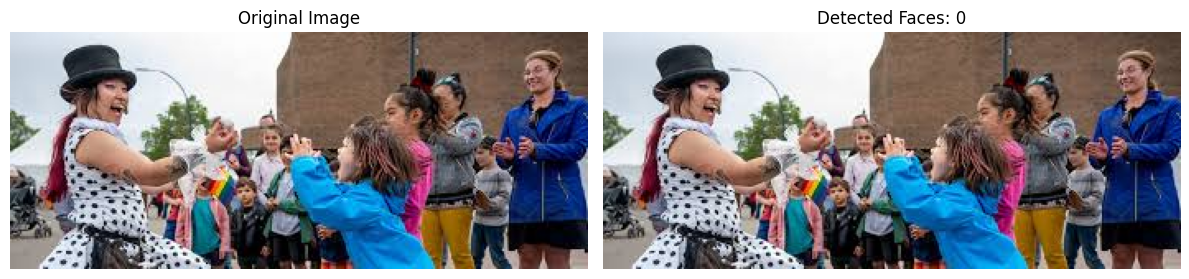

Found 0 faces in images (3).jpg

Experimenting with different parameters on images (3).jpg...


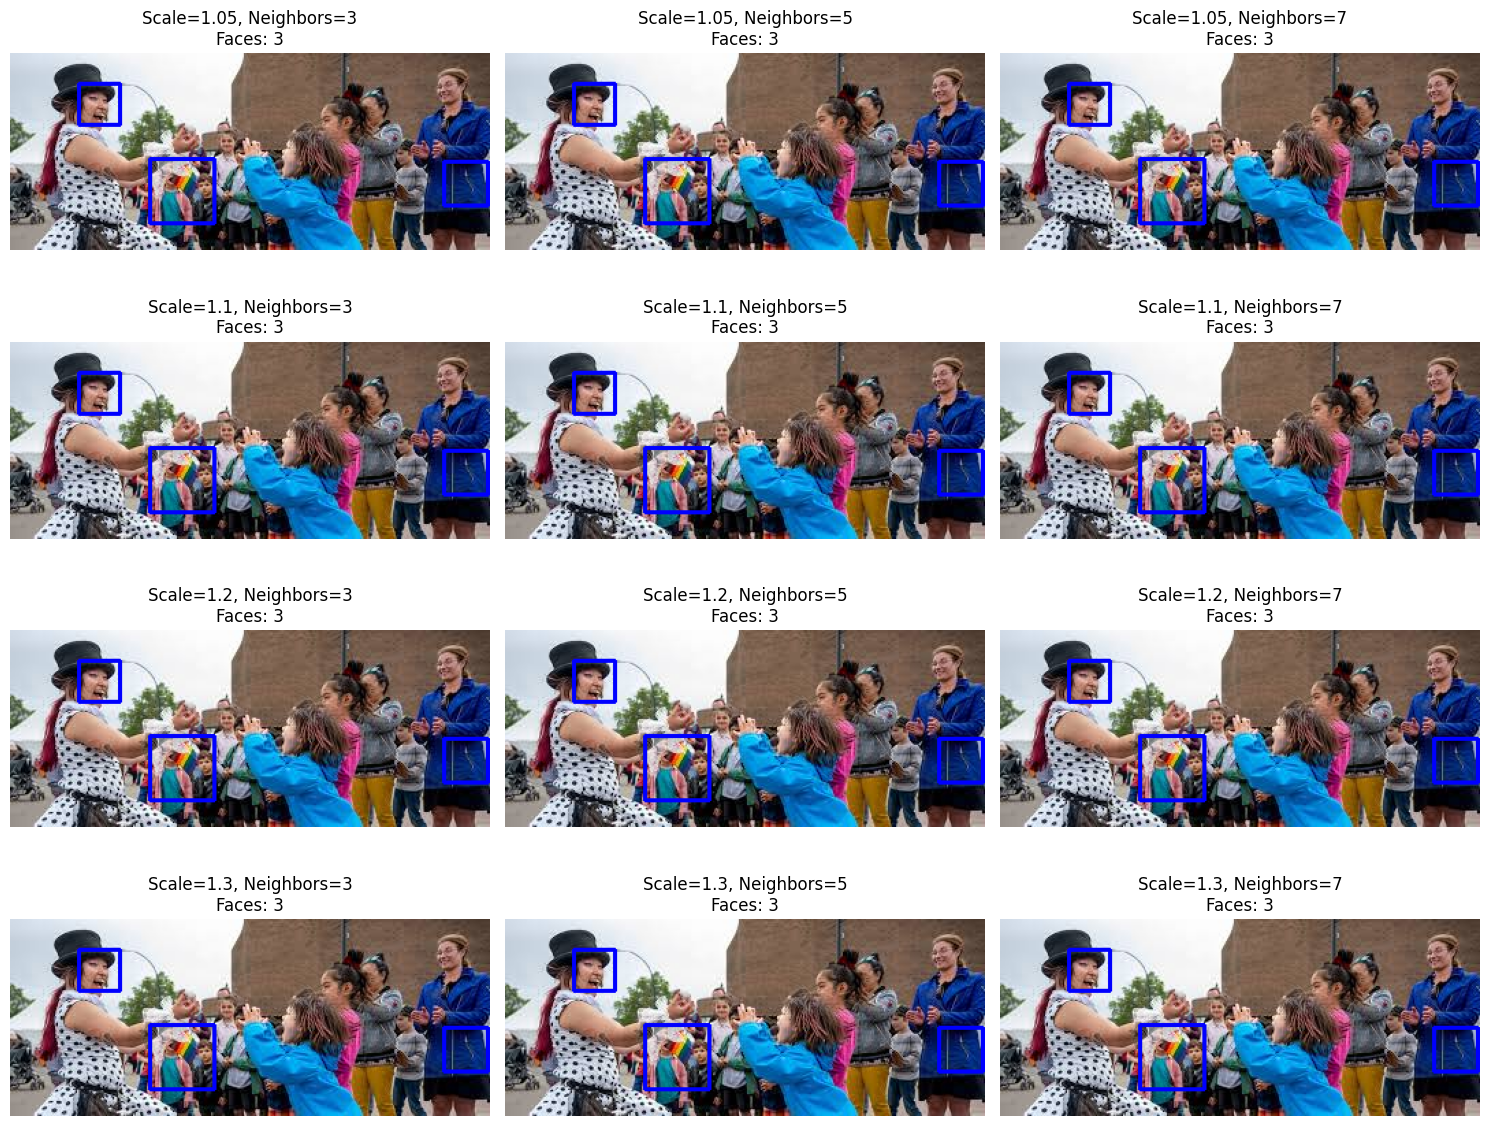

=== Ethical Considerations in Face Detection ===
1. Privacy: Face detection can be used without consent in public spaces.
2. Bias: Many face detection systems have shown bias across different demographics.
3. Surveillance: This technology forms the foundation for surveillance systems.
4. Data Security: How detected face data is stored and protected matters.
5. Informed Consent: People should know when their facial data is being collected.

Recommendations for Ethical Use:
- Only use face detection with clear consent and purpose
- Test systems across diverse populations to ensure equitable performance
- Be transparent about how face data is used and stored
- Consider whether face detection is truly necessary for your application


In [12]:
def print_ethical_considerations():
    print("=== Ethical Considerations in Face Detection ===")
    print("1. Privacy: Face detection can be used without consent in public spaces.")
    print("2. Bias: Many face detection systems have shown bias across different demographics.")
    print("3. Surveillance: This technology forms the foundation for surveillance systems.")
    print("4. Data Security: How detected face data is stored and protected matters.")
    print("5. Informed Consent: People should know when their facial data is being collected.")
    print("\nRecommendations for Ethical Use:")
    print("- Only use face detection with clear consent and purpose")
    print("- Test systems across diverse populations to ensure equitable performance")
    print("- Be transparent about how face data is used and stored")
    print("- Consider whether face detection is truly necessary for your application")

# Main execution
if __name__ == "__main__":
    print("Welcome to the Face Detection App!")
    print("This application will detect faces in your uploaded images.")

    # Process all uploaded images
    results = process_all_images()

    # Optional: If multiple images were uploaded, experiment with one
    if len(uploaded_files) > 0:
        first_image = list(uploaded_files.keys())[0]
        print(f"\nExperimenting with different parameters on {first_image}...")
        experiment_with_parameters(first_image)

    # Print ethical considerations
    print_ethical_considerations()